# NBA Sports Prediction

![image](https://logos-world.net/wp-content/uploads/2020/11/NBA-Logo.png)





## Load Data

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob


Download the .pkl file onto your computer in a location you will remember.

Then navigate to the "Files" folder on the left panel in Colab and upload the .pkl file into the sample_data folder. You will need to repeat this upload process each time you restart your colab notebook.

Once the file is uploaded into sample_data, click the three dots next to the datasets name and select "Copy path". Paste the path in the code below to load your data.

In [ ]:
df = pd.DataFrame()
for file in glob.glob('/content/sample_data/nba_data_total.pkl'):
  df = pd.concat([df, pd.read_pickle(file)])

In [ ]:
columns_drop = ['player']
df_clean = df.drop(columns=columns_drop)

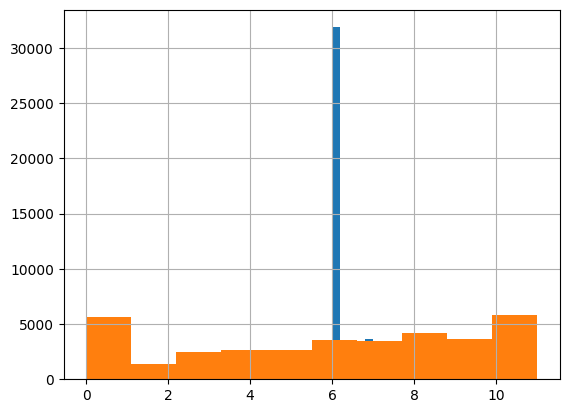

In [ ]:
df_clean["player.height_feet"].hist()
df_clean["player.height_inches"].hist()
df_clean["player.height_feet"] = df_clean["player.height_feet"].fillna(df_clean["player.height_feet"].mean())
df_clean["player.height_inches"] = df_clean["player.height_inches"].fillna(df_clean["player.height_inches"].mean())
df_clean["player.weight_pounds"] = df_clean["player.weight_pounds"].fillna(df_clean["player.weight_pounds"].mean())

In [ ]:
df_clean = df_clean.dropna(axis=0)

In [ ]:
df_clean["player.height"] = df_clean["player.height_feet"] + df_clean["player.height_inches"] / 12.0
df_clean = df_clean.drop(["player.height_feet", "player.height_inches"], axis=1)
df_clean.shape

(59992, 46)

In [ ]:
df_clean["player.team_id"] = df_clean["player.team_id"].astype(int)
df_clean["playing_at_home"] = (df_clean["game.home_team_id"] == df_clean["player.team_id"]).astype(int)
df_clean["playing_at_home"]

0       1
1       0
2       0
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: playing_at_home, Length: 59992, dtype: int64

In [ ]:
df_clean["win"] = (df_clean["playing_at_home"] == df_clean["home_wins"]).astype(int)

In [ ]:
df_clean.describe()

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,game.visitor_team_id,game.visitor_team_score,player.id,player.team_id,player.weight_pounds,team.id,home_wins,player.height,playing_at_home,win
count,5.999200e+04,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000,...,59992.000000,59992.000000,5.999200e+04,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000
mean,6.705100e+06,1.825177,0.364349,2.572576,20.459700,2.609865,0.931608,34.176494,6.604614,3.042939,...,15.404787,109.141286,2.165191e+06,15.753851,217.823374,15.521253,0.547340,6.594580,0.354031,0.491015
std,2.391579e+06,2.469208,0.748099,2.772385,27.959249,3.009799,1.403722,28.316218,6.246747,3.225485,...,8.658486,13.458549,5.020408e+06,8.590928,18.855414,8.665603,0.497758,0.214019,0.478222,0.499923
min,2.848755e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,57.000000,2.000000e+00,1.000000,170.000000,1.000000,0.000000,5.750000,0.000000,0.000000
25%,4.552205e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,8.000000,100.000000,2.040000e+02,8.000000,210.000000,8.000000,0.000000,6.583333,0.000000,0.000000
50%,6.724432e+06,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,37.500000,5.000000,2.000000,...,15.000000,109.000000,4.030000e+02,16.000000,217.823374,16.000000,1.000000,6.594580,0.000000,0.000000
75%,8.807338e+06,3.000000,1.000000,4.000000,40.000000,4.000000,1.000000,52.900000,10.000000,5.000000,...,23.000000,118.000000,6.669230e+05,23.000000,220.000000,23.000000,1.000000,6.666667,1.000000,1.000000
max,1.085254e+07,24.000000,10.000000,21.000000,100.000000,22.000000,12.000000,100.000000,37.000000,22.000000,...,30.000000,158.000000,2.792455e+07,30.000000,290.000000,30.000000,1.000000,7.250000,1.000000,1.000000


In [ ]:
df_clean["win"]

In [ ]:
df_clean["game.home_team_id"]

0        3
1        3
2        3
3        3
4        3
        ..
9995    16
9996    16
9997    16
9998    16
9999    27
Name: game.home_team_id, Length: 59992, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df_clean['win']
y = df_clean['playing_at_home']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1, 1)

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

from sklearn import metrics
y_train_pred = logit_model.predict(X_train)

metrics.confusion_matrix(y_train_pred, y_train)
print((0+22946)/(0+0+19054+22946))

0.5463333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
RMSE_train = (((y_train_pred - y_train)**2).mean())**(0.5)
print('Training Set RMSE is', RMSE_train)

In [ ]:
y_pred = logit_model.predict(X_test)
RMSE_test = (((y_pred - y_test)**2).mean())**(0.5)
print('Testing Set RMSE is', RMSE_test)


Testing Set RMSE is 0.5937033007234516


## Advanced Model



In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df_clean['win']
y = df_clean['playing_at_home']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1, 1)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
788/788 [==============================] - 11s 5ms/step - loss: 0.6488 - accuracy: 0.6441 - val_loss: 0.6475 - val_accuracy: 0.6393
Epoch 2/10
788/788 [==============================] - 4s 5ms/step - loss: 0.6470 - accuracy: 0.6441 - val_loss: 0.6477 - val_accuracy: 0.6393
Epoch 3/10
788/788 [==============================] - 3s 4ms/step - loss: 0.6467 - accuracy: 0.6441 - val_loss: 0.6476 - val_accuracy: 0.6393
Epoch 4/10
788/788 [==============================] - 3s 4ms/step - loss: 0.6465 - accuracy: 0.6441 - val_loss: 0.6486 - val_accuracy: 0.6393
Epoch 5/10
788/788 [==============================] - 4s 5ms/step - loss: 0.6467 - accuracy: 0.6441 - val_loss: 0.6476 - val_accuracy: 0.6393
Epoch 6/10
788/788 [==============================] - 4s 5ms/step - loss: 0.6466 - accuracy: 0.6441 - val_loss: 0.6483 - val_accuracy: 0.6393
Epoch 7/10
788/788 [==============================] - 3s 4ms/step - loss: 0.6465 - accuracy: 0.6441 - val_loss: 0.6476 - val_accuracy: 0.6393
Epoch

In [ ]:
mse_test = model.evaluate(X_test, y_test)
mse_test

563/563 [==============================] - 1s 2ms/step - loss: 0.6453 - accuracy: 0.6475


## Model Tuning



In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=0.001, input_shape=[8]):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))

    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.SGD(lr=learning_rate)

    model.compile(loss="mse", optimizer=optimizer)

    return model